# THE SPARK FOUNDATION #GRIPJUNE23

## Traffic Sign Classification Sysem- Task 5 (Computer vision and IOT)

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image #python Image library
import os
os.chdir('D:/traffic')
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [12]:
# data and their labels using a list
data = []
labels = []
classes = 43
cur_path = os.getcwd()

In [13]:
# preprocessing the image
for i in range(classes):
    path= os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path+'\\'+a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except Exception as e:
            print(e)

In [15]:
# for saving the image date for future use so that we don't have to apply the above for looop again
np.save('./training/data',data)
np.save('./training/target',labels)

In [16]:
# loading the data
data = np.load('./training/data.npy')
lebels = np.load('./training/target.npy')

In [24]:
data.shape

(39209, 30, 30, 3)

In [25]:
x_train, x_test, y_train, y_test = train_test_split(data,labels,test_size=0.2,random_state=0)

In [28]:
# converting labels to one hot encoding (43 class)
y_train = to_categorical(y_train,43)
y_test = to_categorical(y_test,43)

In [30]:
# building the model
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(5,5),activation='relu',input_shape=x_train.shape[1:]))
model.add(Conv2D(filters=32,kernel_size=(5,5),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43,activation='softmax')) #43 classes

In [31]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [35]:
epochs=20
history = model.fit(x_train,y_train,batch_size=32,epochs=epochs,validation_data=(x_test,y_test))

Epoch 1/20
981/981 [==============================] - 103s 104ms/step - loss: 2.7387 - accuracy: 0.2785 - val_loss: 1.3471 - val_accuracy: 0.6422
Epoch 2/20
981/981 [==============================] - 94s 96ms/step - loss: 1.3140 - accuracy: 0.6028 - val_loss: 0.6286 - val_accuracy: 0.8242
Epoch 3/20
981/981 [==============================] - 114s 116ms/step - loss: 0.7789 - accuracy: 0.7612 - val_loss: 0.3121 - val_accuracy: 0.9118
Epoch 4/20
981/981 [==============================] - 108s 110ms/step - loss: 0.4622 - accuracy: 0.8604 - val_loss: 0.1391 - val_accuracy: 0.9616
Epoch 5/20
981/981 [==============================] - 97s 99ms/step - loss: 0.3355 - accuracy: 0.9007 - val_loss: 0.2179 - val_accuracy: 0.9351
Epoch 6/20
981/981 [==============================] - 95s 96ms/step - loss: 0.2894 - accuracy: 0.9177 - val_loss: 0.1014 - val_accuracy: 0.9721
Epoch 7/20
981/981 [==============================] - 99s 101ms/step - loss: 0.2553 - accuracy: 0.9284 - val_loss: 0.0898 - val_ac

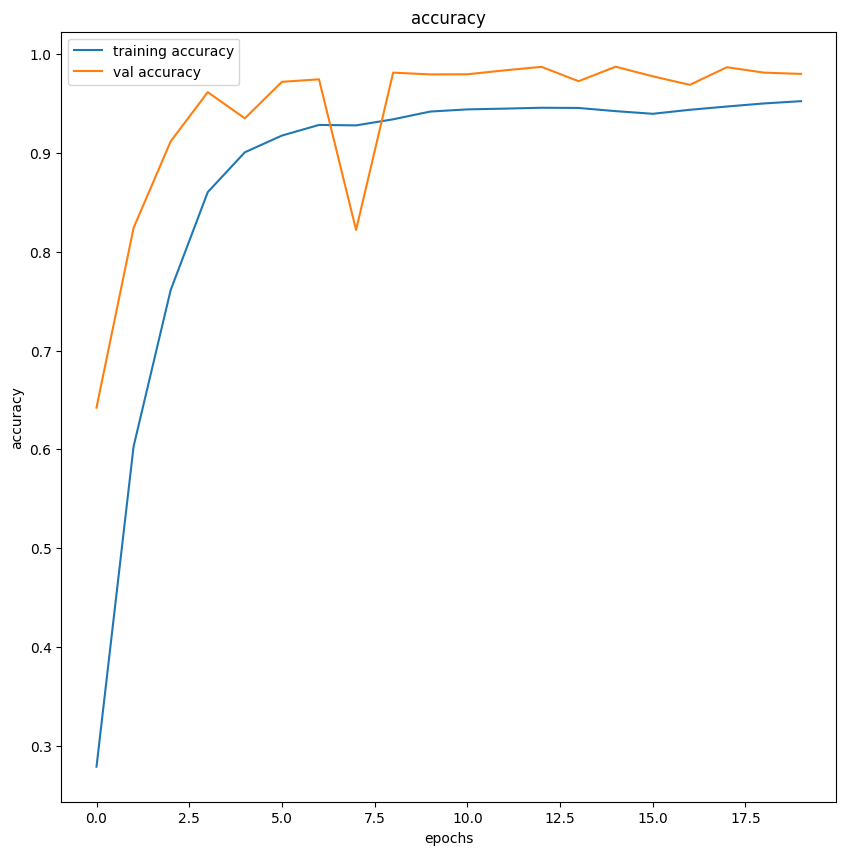

In [37]:
# accuracy
plt.figure(figsize=(10,10))
plt.plot(history.history['accuracy'],label='training accuracy')
plt.plot(history.history['val_accuracy'],label='val accuracy')
plt.title('accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [67]:
# testing on test data
def testing(testcsv):
    y_test = pd.read_csv(testcsv)
    label = y_test["ClassId"].values
    imgs = y_test["Path"].values
    data = []
    for img in imgs:
        image = Image.open(img)
        image = image.resize((30,30))
        data.append(np.array(image))
    x_test = np.array(data)
    return x_test, label

In [68]:
x_test, label = testing('Test.csv')

In [69]:
y_pred = np.argmax(model.predict(x_test), axis=-1)

395/395 [==============================] - 4s 11ms/step


In [70]:
y_pred.shape

(12630,)

In [71]:
from sklearn.metrics import accuracy_score
accuracy_score(label,y_pred)

0.9418052256532067

In [72]:
model.save('./training/TSR.h5')

In [3]:
# loading the model
import os
os.chdir(r'D:/traffic')
from keras.models import load_model
model = load_model('./training//TSR.h5')

In [4]:
# Classes of trafic signs
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [5]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def test_on_img(img):
    data =[]
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    x_test = np.array(data)
    # old version code: y_pred = model.predict_classes(x_test)
    y_pred = np.argmax(model.predict(x_test), axis=-1)
    return image,y_pred

In [6]:
# Select the picture to be predicted

1/1 [==============================] - 0s 29ms/step
The sign predicts:  Children crossing


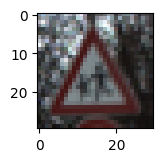

In [11]:
plt.figure(figsize=(1.5,1.5))
plot, prediction = test_on_img(r'D:/traffic/Test/01356.png') # CHANGE THE INT VALUE OF THE IMAGE TO SEE TH PREDICTION
s = [str(i) for i in prediction]
a = int("".join(s))
print("The sign predicts: ",classes[a])
plt.imshow(plot)
plt.show()